# California Housing Dataset: A series of simple example models

### Source: https://medium.com/@polanitzer/machine-learning-for-california-housing-e979ec5f5971

## Imports and Setup

In [82]:
# Imported libraries
import pandas as pd
import numpy as np
import seaborn as sb    
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
# Imported California Housing dataset from Scikit Learn library
from sklearn.datasets import fetch_california_housing
# Initialize Dataset to a variable (Dataset in numpy form)
housing_data = fetch_california_housing()
descr = housing_data['DESCR']
feature_names = housing_data['feature_names']
data = housing_data['data']
target = housing_data['target']
df1 = pd.DataFrame(data=data)
df1.rename(columns={0: feature_names[0], 1: feature_names[1], 2: feature_names[2], 3: feature_names[3],
 4: feature_names[4], 5: feature_names[5], 6: feature_names[6], 7: feature_names[7]}, inplace=True)
df2 = pd.DataFrame(data=target)
df2.rename(columns={0: 'Target'}, inplace=True)
housing = pd.concat([df1, df2], axis=1)
print(housing.columns)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Target'],
      dtype='object')


## Brief overview of Data

In [44]:
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [45]:
housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [46]:
print("dimension of housing data: {}".format(housing.shape))

dimension of housing data: (20640, 9)


In [47]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


## k-Nearest Neighbors Regressor

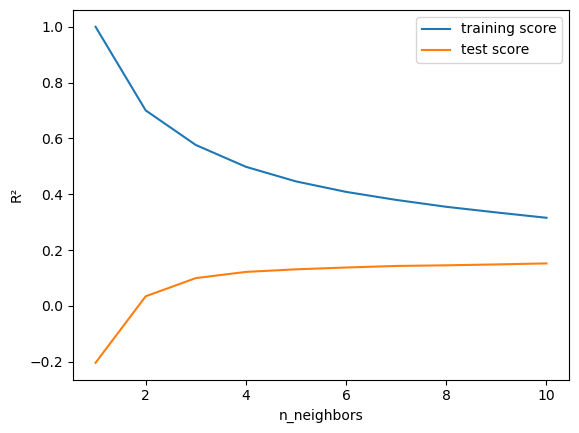

In [48]:
# Using from sklearn.model_selection import train_test_split and from sklearn.neighbors import KNeighborsRegressor
X_train, X_test, y_train, y_test = train_test_split(housing.loc[:, housing.columns != 'Target'], housing['Target'], random_state=66)
training_score = []
test_score = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
 # build the model
 knn = KNeighborsRegressor(n_neighbors=n_neighbors)
 knn.fit(X_train, y_train)
 # record training set score
 training_score.append(knn.score(X_train, y_train))
 # record test set score
 test_score.append(knn.score(X_test, y_test))
plt.plot(neighbors_settings, training_score, label="training score")
plt.plot(neighbors_settings, test_score, label="test score")
plt.ylabel("R²")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

### This graph suggests that as we use more nearest neighbors, the r^2 increases resulting in less accuracy, and it also shows that the best amount of nearest neighbors to use is 10 before it gets to complex.

In [49]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
k1 = knn.score(X_train, y_train)
k2 = knn.score(X_test, y_test)
print("R² of KNN Regressor on training set: {:.3f}".format(k1))
print("R² of KNN Regressor on test set: {:.3f}".format(k2))

R² of KNN Regressor on training set: 0.316
R² of KNN Regressor on test set: 0.152


## Linear Regression

In [50]:
# Using from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
l1 = linreg.score(X_train, y_train)
l2 = linreg.score(X_test, y_test)
print("R² of Linear Regression on training set: {:.3f}".format(l1))
print("R² of Linear Regression on test set: {:.3f}".format(l2))

R² of Linear Regression on training set: 0.603
R² of Linear Regression on test set: 0.609


## Decision Tree Regressor

In [51]:
# Using from sklearn.tree import DecisionTreeRegressor
housing_features = [x for i,x in enumerate(housing.columns) if i!=8]

tree = DecisionTreeRegressor(random_state=0)
tree.fit(X_train, y_train)

t1 = tree.score(X_train, y_train)
t2 = tree.score(X_test, y_test)

print("R² of Linear Regression on training set: {:.3f}".format(t1))
print("R² of Linear Regression on test set: {:.3f}".format(t2))

R² of Linear Regression on training set: 1.000
R² of Linear Regression on test set: 0.611


In [53]:
tree1 = DecisionTreeRegressor(max_depth=7, random_state=0)
tree1.fit(X_train, y_train)
t3 = tree1.score(X_train, y_train)
t4 = tree1.score(X_test, y_test)
print("R² of Decision Tree Regressor on training set: {:.3f}".format(t3))
print("R² of Decision Tree Regressor on test set: {:.3f}".format(t4))


R² of Decision Tree Regressor on training set: 0.706
R² of Decision Tree Regressor on test set: 0.662


## Feature Importance in Decision Tree Regressor


In [56]:
print("Feature importances:\n{}".format(tree1.feature_importances_))


Feature importances:
[0.68862457 0.04268309 0.02863728 0.00109839 0.00624022 0.13876369
 0.05638354 0.03756921]


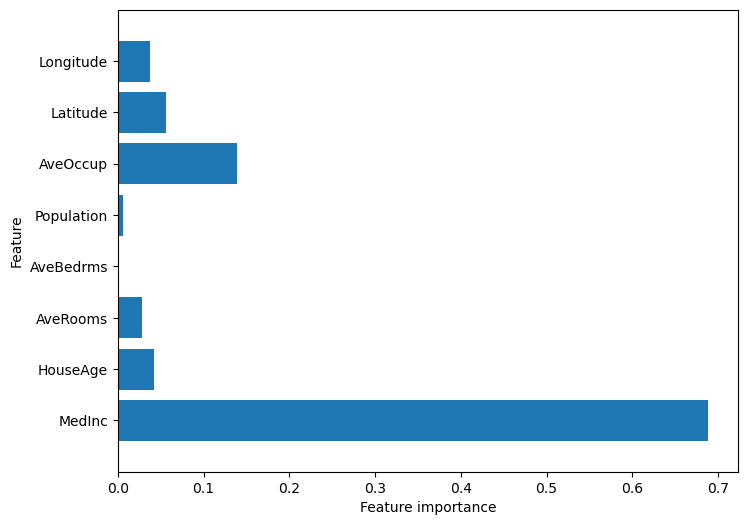

In [122]:
def plot_feature_importances_housing(model):
 plt.figure(figsize=(8,6))
 n_features = 8
 plt.barh(range(n_features), model.feature_importances_, align='center')
 plt.yticks(np.arange(n_features), housing_features)
 plt.xlabel("Feature importance")
 plt.ylabel("Feature")
 plt.ylim(-1, n_features)
plot_feature_importances_housing(tree1)
plt.savefig('feature_importance')

## Random Forest Regressor


In [64]:
# Using from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
r1 = rf.score(X_train, y_train)
r2 = rf.score(X_test, y_test)
print("R² of Random Forest Regressor on training set: {:.3f}".format(r1))
print("R² of Random Forest Regressor on test set: {:.3f}".format(r2))

R² of Random Forest Regressor on training set: 0.973
R² of Random Forest Regressor on test set: 0.813


In [66]:
rf1 = RandomForestRegressor(max_depth=7, n_estimators=100, random_state=42)
rf1.fit(X_train, y_train)
r3 = rf1.score(X_train, y_train)
r4 = rf1.score(X_test, y_test)
print("R² of Random Forest Regressor on training set: {:.3f}".format(r3))
print("R² of Random Forest Regressor on test set: {:.3f}".format(r4))

R² of Random Forest Regressor on training set: 0.762
R² of Random Forest Regressor on test set: 0.733


## Feature importance in Random Forest Regressor


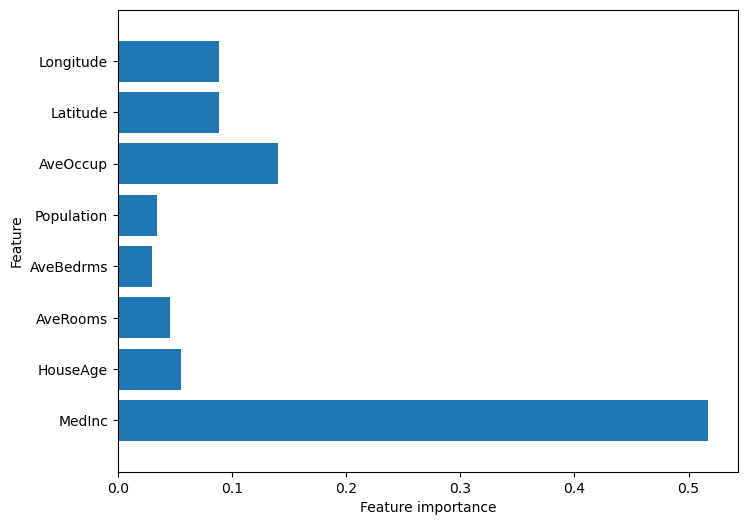

In [67]:
plot_feature_importances_housing(rf)


## Gradient Boosting Regressor


In [70]:
# Using from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state=0)
gb.fit(X_train, y_train)
g1 = gb.score(X_train, y_train)
g2 = gb.score(X_test, y_test)
print("R^2 of Gradient Boosting Regressor on training set: {:.3f}".format(g1))
print("R^2 of Gradient Boosting Regressor on test set: {:.3f}".format(g2))

R^2 of Gradient Boosting Regressor on training set: 0.808
R^2 of Gradient Boosting Regressor on test set: 0.795


In [71]:
gb1 = GradientBoostingRegressor(random_state=0, max_depth=4)
gb1.fit(X_train, y_train)
g3 = gb1.score(X_train, y_train)
g4 = gb1.score(X_test, y_test)
print("R² of Gradient Boosting Regressor on training set: {:.3f}".format(g3))
print("R² of Gradient Boosting Regressor on test set: {:.3f}".format(g4))

R² of Gradient Boosting Regressor on training set: 0.842
R² of Gradient Boosting Regressor on test set: 0.814


In [72]:
gb2 = GradientBoostingRegressor(random_state=0, learning_rate=0.15)
gb2.fit(X_train, y_train)
g5 = gb2.score(X_train, y_train)
g6 = gb2.score(X_test, y_test)
print("R² of Gradient Boosting Regressor on training set: {:.3f}".format(g5))
print("R² of Gradient Boosting Regressor on test set: {:.3f}".format(g6))

R² of Gradient Boosting Regressor on training set: 0.823
R² of Gradient Boosting Regressor on test set: 0.808


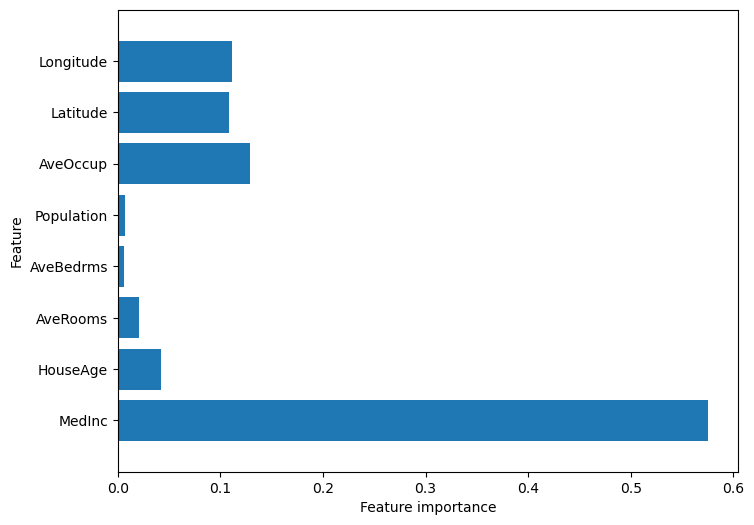

In [73]:
plot_feature_importances_housing(gb1)


## Support Vector Regressor


In [76]:
# Using from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)
s1 = svr.score(X_train, y_train)
s2 = svr.score(X_test, y_test)
print("R² of Support Vector Regressor on training set: {:.3f}".format(s1))
print("R² of Support Vector Regressor on test set: {:.3f}".format(s2))


R² of Support Vector Regressor on training set: -0.023
R² of Support Vector Regressor on test set: -0.033


In [124]:
# Using from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
svr1 = SVR()
svr1.fit(X_train_scaled, y_train)
s3 = svr1.score(X_train_scaled, y_train)
s4 = svr1.score(X_test_scaled, y_test)
print("R² of Support Vector Regressor on training set: {:.3f}".format(s3))
print("R² of Support Vector Regressor on test set: {:.3f}".format(s4))


R² of Support Vector Regressor on training set: 0.659
R² of Support Vector Regressor on test set: 0.663


In [79]:
svr2 = SVR(gamma=10)
svr2.fit(X_train_scaled, y_train)
s5 = svr2.score(X_train_scaled, y_train)
s6 = svr2.score(X_test_scaled, y_test)
print("R² of Support Vector Regressor on training set: {:.3f}".format(s5))
print("R² of Support Vector Regressor on test set: {:.3f}".format(s6))

R² of Support Vector Regressor on training set: 0.702
R² of Support Vector Regressor on test set: 0.697


## Deep Learning

In [123]:
# Using from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(random_state=42)
mlp.fit(X_train, y_train)
m1 = mlp.score(X_train, y_train)
m2 = mlp.score(X_test, y_test)
print("R² of MLP Regressor on training set: {:.3f}".format(m1))
print("R² of MLP Regressor on test set: {:.3f}".format(m2))


R² of MLP Regressor on training set: 0.502
R² of MLP Regressor on test set: 0.459


In [125]:
# Using from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
mlp1 = MLPRegressor(random_state=0)
mlp1.fit(X_train_scaled, y_train)
m3 = mlp1.score(X_train_scaled, y_train)
m4 = mlp1.score(X_test_scaled, y_test)
print("R² of MLP Regressor on training set: {:.3f}".format(m3))
print("R² of MLP Regressor on test set: {:.3f}".format(m4))

R² of MLP Regressor on training set: 0.773
R² of MLP Regressor on test set: 0.723


In [85]:
mlp2 = MLPRegressor(max_iter=1000, random_state=0)
mlp2.fit(X_train_scaled, y_train)
m5 = mlp2.score(X_train_scaled, y_train)
m6 = mlp2.score(X_test_scaled, y_test)
print("R² of MLP Regressor on training set: {:.3f}".format(m5))
print("R² of MLP Regressor on test set: {:.3f}".format(m6))

R² of MLP Regressor on training set: 0.773
R² of MLP Regressor on test set: 0.723


In [86]:
mlp3 = MLPRegressor(max_iter=1000, alpha=1, random_state=0)
mlp3.fit(X_train_scaled, y_train)
m7 = mlp3.score(X_train_scaled, y_train)
m8 = mlp3.score(X_test_scaled, y_test)
print("R² of MLP Regressor on training set: {:.3f}".format(m7))
print("R² of MLP Regressor on test set: {:.3f}".format(m8))

R² of MLP Regressor on training set: 0.740
R² of MLP Regressor on test set: 0.714


## Conclusion

In [97]:
models = ['KNN Regressor', 'Linear Regression', 'Decision Tree Regressor' ,'Random Forest Regressor',
 'Gradient Boosting Regressor','Support Vector Regressor', 'MLP Regressor']
tests_score = [k2, l2, t4, r2, g4, s6, m8]
compare_models = pd.DataFrame({ "Algorithms": models, "Tests Score": tests_score })
compare_models.sort_values(by = "Tests Score", ascending = False)

,Algorithms,Tests Score
4,Gradient Boosting Regressor,0.813916
3,Random Forest Regressor,0.812697
6,MLP Regressor,0.713938
5,Support Vector Regressor,0.696645
2,Decision Tree Regressor,0.661990
1,Linear Regression,0.609141
0,KNN Regressor,0.152372


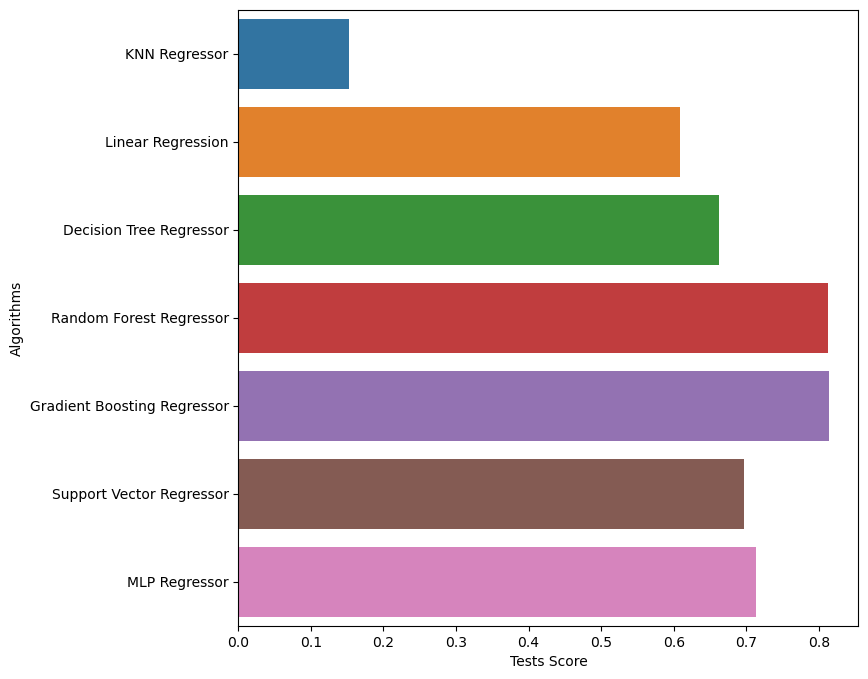

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,8))
sb.barplot(x = "Tests Score", y = "Algorithms", data = compare_models)
plt.show()